In [1]:
from markov_device import *
import matplotlib.pyplot as plt
import seaborn as sns

ACT-R connection has been started.


## Model-Free

In [2]:
def test3(m, title_name='model-free', n=100):
    
    m.run_experiment(n)
    
    sub_index = np.arange(0, n+1, n/10)
    
    # production trace
    df1 = m.df_actr_production_traces(parameter_name=':utility')
    df1 = df1[df1.apply(lambda x:x['index'] in sub_index, axis=1)]
    
    # memory trace
    df2 = m.df_actr_chunk_traces(parameter_name=':Last-Retrieval-Activation')
    df2 = df2[df2.apply(lambda x:x['index'] in sub_index, axis=1)]
    
    selected_memory = ['M1-1', 'M1-2','M1-3','M1-4','M2-1', 'M2-2','M2-3','M2-4']
    df2 = df2[df2.apply(lambda x: x['memory'] in selected_memory, axis=1)]
    
    return df1, df2

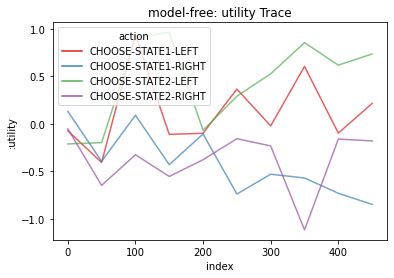

In [3]:
m = MarkovACTR(setup=False)
m.setup(model='markov-model1', verbose=False)

df1, df2 = test3(m, 'model-free', 500)
 
ax = sns.lineplot(data = df1, x='index', y=':utility', hue='action', alpha=.7, palette='Set1')
plt.title('model-free: utility Trace')
plt.show()

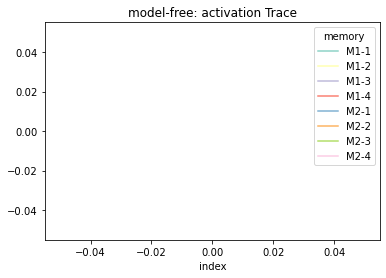

In [4]:
ax = sns.lineplot(data = df2, x='index', y=':Last-Retrieval-Activation', hue='memory', alpha=.7, palette='Set3')
plt.title('model-free: activation Trace')
plt.show()

## Model-Base

In [5]:
m = MarkovACTR(setup=False)
m.setup(model='markov-model2', verbose=False)

df1, df2 = test3(m, 'model-base', 500)

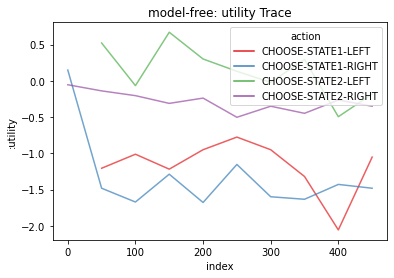

In [6]:
ax = sns.lineplot(data = df1, x='index', y=':utility', hue='action', alpha=.7, palette='Set1')
plt.title('model-free: utility Trace')
plt.show()

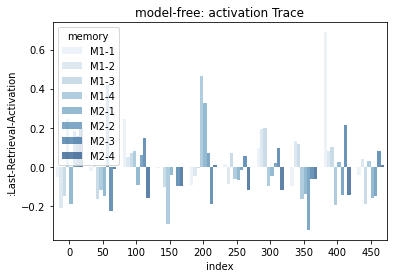

In [7]:
ax = sns.barplot(data = df2, x='index', y=':Last-Retrieval-Activation', hue='memory', alpha=.7, palette='Blues')
plt.title('model-free: activation Trace')
plt.show()